# **PROYECTO FINAL “Hands on” (Diplomatura Big Data y Machine Learning)** 

*Autor: Pierre Padilla Huamantinco*

##**1.To install Python packges: BioPython, TreeSwift, and TreeCluster**

In [1]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass

     |████████████████████████████████| 2.3 MB 4.1 MB/s 


In [2]:
!pip install treeswift

In [3]:
!pip install treecluster

##**2. Exploratory Analysis of Phylogenetic Tree w/ TreeSwift**

In [4]:
import numpy as np
import pandas as pd
import treeswift

In [5]:
#To read Newick file
tree = treeswift.read_tree_newick("/content/all_alineados_C37_editado.nwk")

In [6]:
#Dictionary for mapping labels
map_leaves = tree.label_to_node()

#Leaf Count
print('Leaf count: ', len(map_leaves))

Leaf count:  4698


In [7]:
#Number of Nodes
all_nodes = tree.num_nodes()                 # include all nodes
only_internal = tree.num_nodes(leaves=False) # exclude terminal nodes
only_leaves = tree.num_nodes(internal=False) # exclude internal nodes

print('Number of Nodes: ', all_nodes)

Number of Nodes:  9393


In [8]:
#Average Branch Length
all_branches = tree.avg_branch_length() # include all branches
print('Average Branch Length: ', all_branches)

Average Branch Length:  4.7280342653316475e-05


In [9]:
#Diameter (i.e., maximum leaf-to-leaf distance)
diam = tree.diameter()
print('The diameter of the tree: ', diam)

The diameter of the tree:  0.005232300199999999


In [10]:
#Closest Leaf to Root
leaf,distance = tree.closest_leaf_to_root() # returns a (leaf,distance) tuple
print('The Closes Leaf to Root: ', leaf)
print('Distance from the Closest Leaf to Root: ',distance)

The Closes Leaf to Root:  'NC_045512.2'
Distance from the Closest Leaf to Root:  9.910845000000006e-05


In [11]:
#Furthest Node from Root
node,distance = tree.furthest_from_root() # returns a (node,distance) tuple
print('The Furthest Node from Root: ', node)
print('Distance from Furthest Node to Root: ',distance)

The Furthest Node from Root:  'hCoV-19/Colombia/un-UNAL-5_SAMPLE_15/2021'
Distance from Furthest Node to Root:  0.00412813045


##**3. Finding Clusters w/ TreeCluster**

In [12]:
from Bio import Phylo

In [13]:
#To run TreeCluster.py ---> Threshold = 0.0046
!python TreeCluster.py -i /content/all_alineados_C37_editado.nwk -t 0.0046 > output.txt

In [14]:
#To save the Clusters in a dictionary 
d = {}
with open("/content/output.txt") as f:
    for line in f:
       if "'" in line:
          key, val = line.split()
          key = key.strip("'")
          d[key] = int(val)
#len(d)

In [15]:
#To identify the number of Clusters and Labels
clust = {}
  
for key, value in d.items():
    if value not in clust:
        clust[value] = [key]
    else:
        clust[value].append(key)
  
print(f'{len(clust)} Clusters were found:\n')
#print("final_dictionary", str(clust))

for key, value in clust.items():
  print(f'Cluster {key}: {len(value)}')

15 Clusters were found:

Cluster -1: 8
Cluster 1: 2
Cluster 2: 135
Cluster 3: 6
Cluster 4: 8
Cluster 5: 7
Cluster 6: 7
Cluster 7: 6
Cluster 8: 377
Cluster 9: 1294
Cluster 10: 313
Cluster 11: 19
Cluster 12: 5
Cluster 13: 2200
Cluster 14: 310


##**4. Phylogenetic Tree Viz**

In [16]:
from Bio import Phylo
from Bio.Phylo.Applications import PhymlCommandline
from Bio.Phylo.PAML import codeml
from Bio.Phylo.PhyloXML import Phylogeny
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]
#Set up with a higher resolution screen
%config InlineBackend.figure_format = 'retina'

In [17]:
#To convert .nwk file to .xml file
tree2 = Phylo.read("/content/all_alineados_C37_editado.nwk", "newick")
tree_xml = tree2.as_phyloxml()
tree_xml = Phylogeny.from_tree(tree_xml)

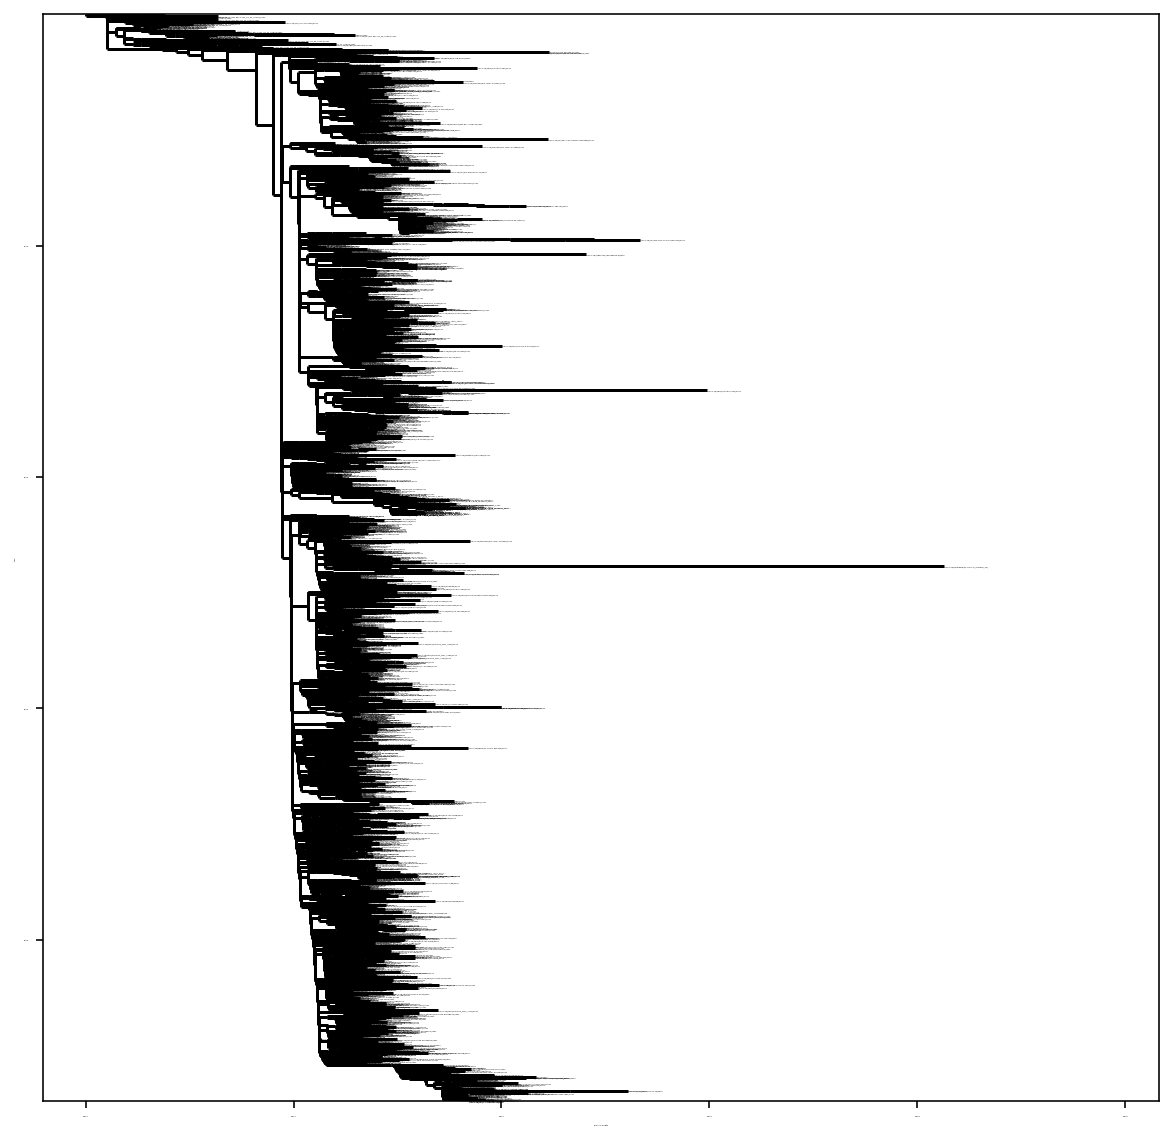

In [18]:
#To draw a Standard Time Tree
plt.rc('font', size=0)
tree_xml.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw(tree_xml)

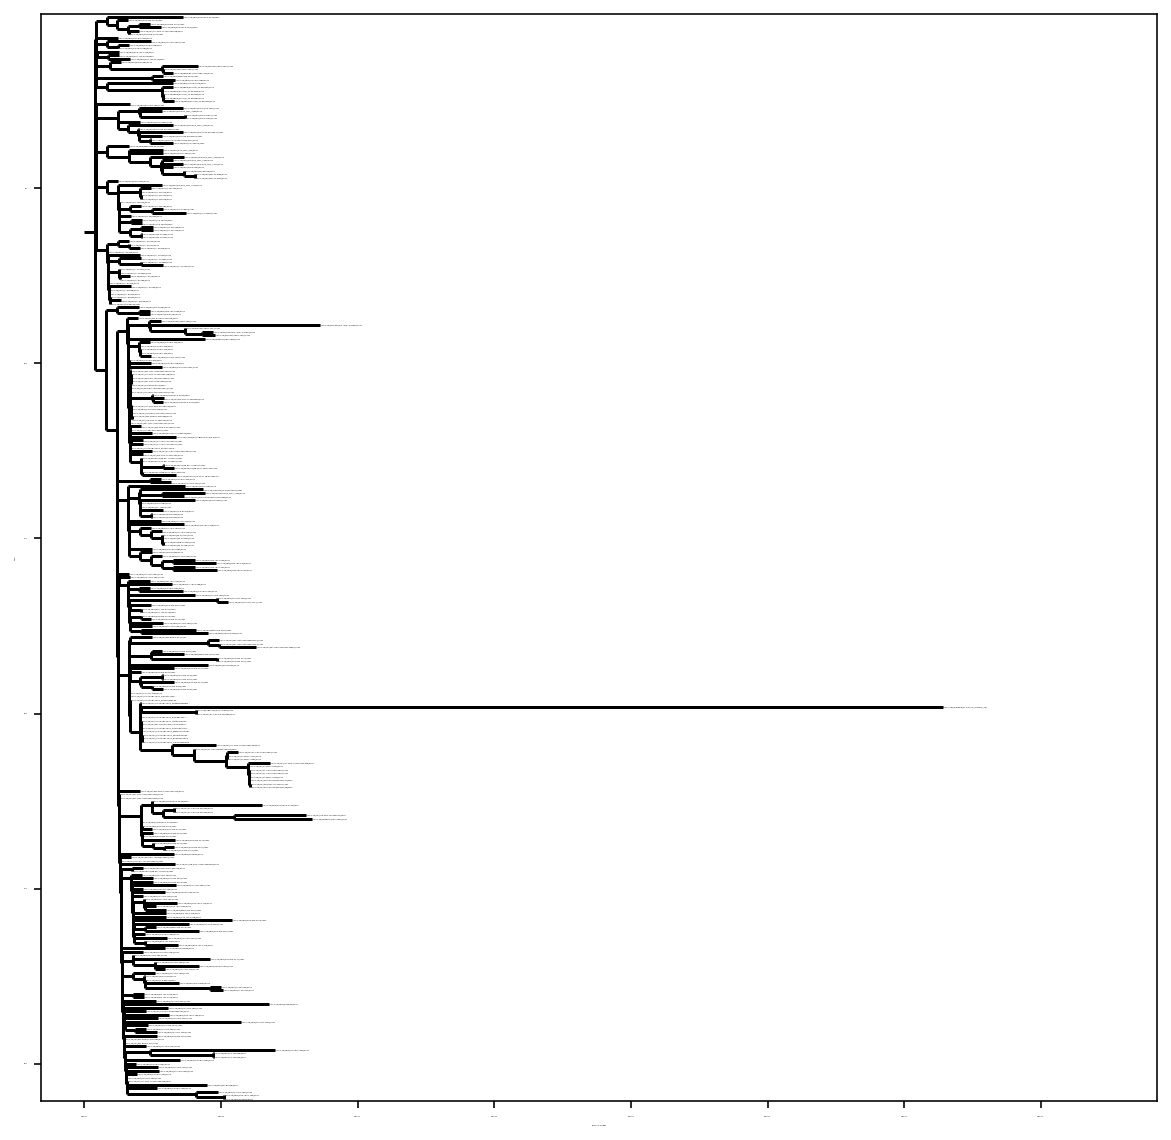

In [19]:
#To draw a subtree of a specific cluster
lst=[]

for label, w in d.items():
  if w == 14: lst.append(label)

common_ancestor = tree2.common_ancestor(lst)

#To draw a Standard Time Tree
plt.rc('font', size=0)
common_ancestor.ladderize()
Phylo.draw(common_ancestor)
#Phylo.draw_ascii(common_ancestor)  

##**5. Phylogenetic Tree Viz w/ Cluster of Mutations**

In [20]:
#To load dataset
tsv_data = pd.read_csv('/content/metadata_microreact.tsv', sep='\t')
tsv_data.head(6)

,id,gisaid_epi_isl__autocolor,date__autocolor,Continent__autocolor,country__autocolor,host__autocolor,age__autocolor,sex__autocolor,pangolin_lineage__autocolor,GISAID_clade__autocolor,C26894T__autocolor,C29370T__autocolor,C21575T__autocolor,C28849T__autocolor,T11296G__autocolor,A23702G__autocolor,G28044T__autocolor,G3307T__autocolor,T11428A__autocolor,C29750T__autocolor,G23587T__autocolor,C28435T__autocolor,C1059T__autocolor,G25563T__autocolor,T3952C__autocolor,C21727T__autocolor,C26885T__autocolor,C10336T__autocolor,A28254C__autocolor,C23277T__autocolor,C11020T__autocolor,A28877T__autocolor,G28878C__autocolor,G25720T__autocolor,G28628C__autocolor,T14451C__autocolor,A23203G__autocolor,T27401C__autocolor,C20806T__autocolor,T25760C__autocolor,G27361T__autocolor,G21777A__autocolor,C4113T__autocolor
0,hCoV-19/Argentina/INEI096534/2020,EPI_ISL_2158693,2020-11-08,South America,Argentina,Human,27,Female,C.37,GR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hCoV-19/Argentina/INEI100632/2021,EPI_ISL_2104813,2021-01-29,South America,Argentina,Human,32,Male,C.37,GR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hCoV-19/Argentina/INEI102214/2021,EPI_ISL_2135148,2021-03-09,South America,Argentina,Human,unknown,unknown,C.37,GR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hCoV-19/Argentina/INEI102437/2021,EPI_ISL_2135258,2021-03-08,South America,Argentina,Human,31,Male,C.37,GR,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hCoV-19/Argentina/INEI102438/2021,EPI_ISL_2135260,2021-03-08,South America,Argentina,Human,54,Female,C.37,GR,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,hCoV-19/Argentina/INEI103051/2021,EPI_ISL_2135330,2021-03-24,South America,Argentina,Human,39,Female,C.37,GR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Dataset Summary
tsv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4697 entries, 0 to 4696
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4697 non-null   object 
 1   gisaid_epi_isl__autocolor    4697 non-null   object 
 2   date__autocolor              4697 non-null   object 
 3   Continent__autocolor         4697 non-null   object 
 4   country__autocolor           4697 non-null   object 
 5   host__autocolor              4697 non-null   object 
 6   age__autocolor               4697 non-null   object 
 7   sex__autocolor               4697 non-null   object 
 8   pangolin_lineage__autocolor  4697 non-null   object 
 9   GISAID_clade__autocolor      4697 non-null   object 
 10  C26894T__autocolor           4677 non-null   float64
 11  C29370T__autocolor           4677 non-null   float64
 12  C21575T__autocolor           4677 non-null   float64
 13  C28849T__autocolor

In [22]:
#To identify specific mutations: C21727T and T3952C
tsv_data_mod=tsv_data.filter(regex = 'id|C21727T__autocolor|T3952C__autocolor', axis = 1)
tsv_data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4697 entries, 0 to 4696
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         4697 non-null   object 
 1   gisaid_epi_isl__autocolor  4697 non-null   object 
 2   T3952C__autocolor          4677 non-null   float64
 3   C21727T__autocolor         4677 non-null   float64
dtypes: float64(2), object(2)
memory usage: 146.9+ KB


In [23]:
#Total of missing values
nan = tsv_data_mod.isna().sum().sum()
print(f'Total of missing values: {nan}')

Total of missing values: 40


In [24]:
#Distribution of missing values per variable
total_nan = tsv_data_mod.isna().sum().sort_values(ascending=True)
perc_nan = round((tsv_data_mod.isna().sum()/len(tsv_data_mod))*100,2).sort_values(ascending=True)
pd.concat([total_nan, perc_nan],axis=1,keys=['Total', 'Percentage(%)']).T

,id,gisaid_epi_isl__autocolor,T3952C__autocolor,C21727T__autocolor
Total,0.0,0.0,20.00,20.00
Percentage(%),0.0,0.0,0.43,0.43


In [25]:
#Cleaning of missing values per variable
tsv_data_mod = tsv_data_mod.dropna()

total_nan = tsv_data_mod.isna().sum().sort_values(ascending=True)
perc_nan = round((tsv_data_mod.isna().sum()/len(tsv_data_mod))*100,2).sort_values(ascending=True)
pd.concat([total_nan, perc_nan],axis=1,keys=['Total', 'Percentage(%)']).T

,id,gisaid_epi_isl__autocolor,T3952C__autocolor,C21727T__autocolor
Total,0.0,0.0,0.0,0.0
Percentage(%),0.0,0.0,0.0,0.0


##**5.1.  Mutation: T3952C**

In [26]:
#To filter specific mutations: T3952C
ds_T3952C = tsv_data.filter(regex = 'id|T3952C__autocolor', axis = 1)
ds_T3952C = ds_T3952C[ds_T3952C['T3952C__autocolor']==1]
ds_T3952C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 159 to 4676
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         369 non-null    object 
 1   gisaid_epi_isl__autocolor  369 non-null    object 
 2   T3952C__autocolor          369 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.5+ KB


In [27]:
#To create a list of seqs w/ mutation: T3952C 
ds_T3952C_ls = ds_T3952C['id'].to_list()
#ds_T3952C_ls

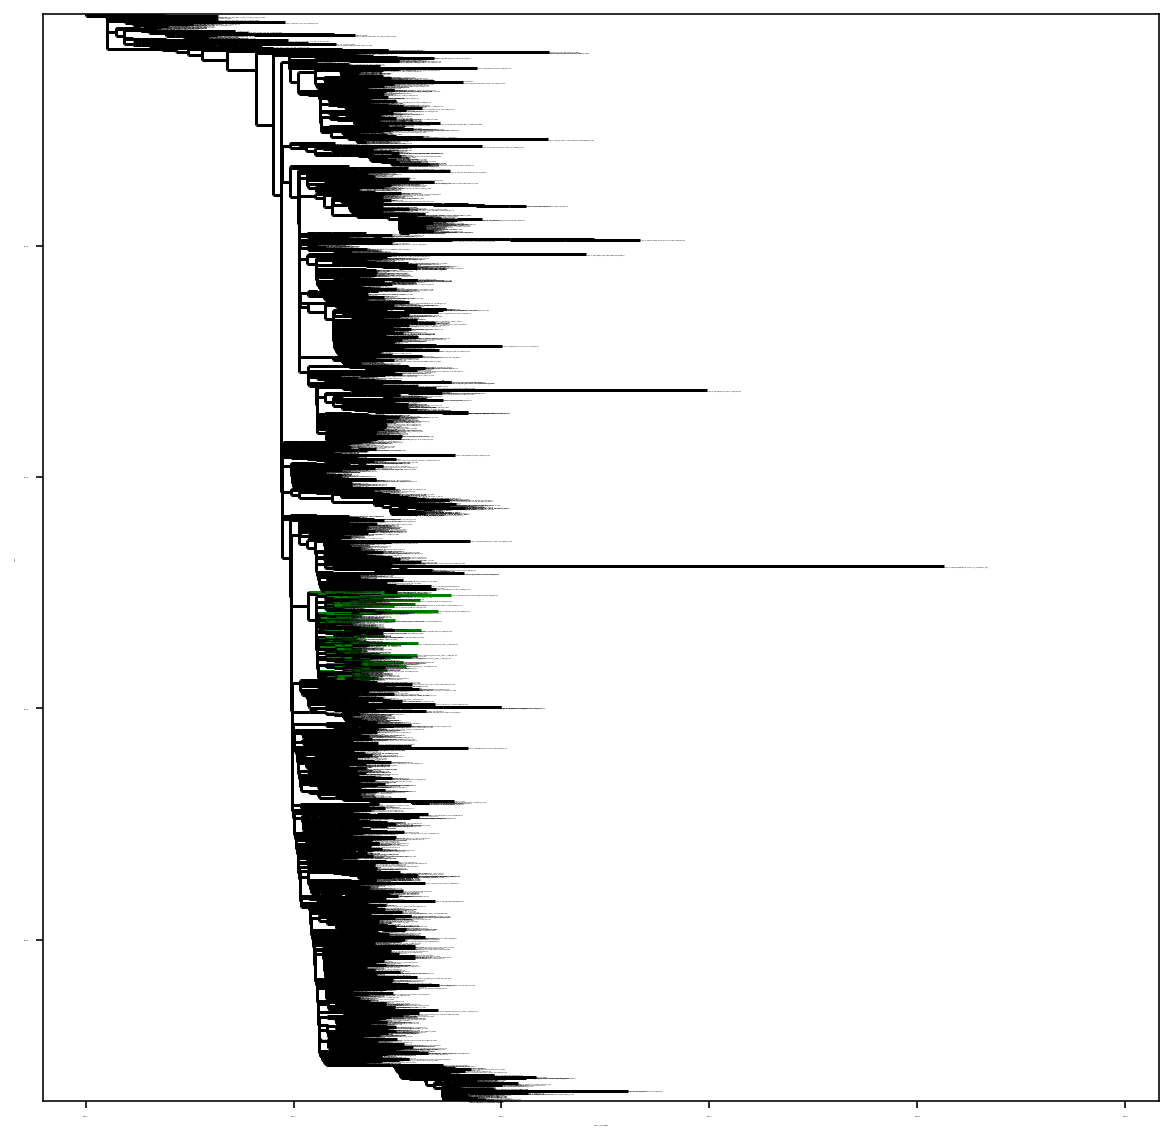

In [28]:
#To colour all the branches w/ mutation: T3952C 
tree_T3952C = tree2.as_phyloxml()

for clade in tree_T3952C.get_terminals():
    if clade.name in ds_T3952C_ls: clade.color = 'green'

#To draw a Standard Time Tree
plt.rc('font', size=0)
tree_T3952C.ladderize()
Phylo.draw(tree_T3952C)

##**5.2.  Mutation: C21727T**

In [29]:
#To filter specific mutations: C21727T
ds_C21727T = tsv_data.filter(regex = 'id|C21727T__autocolor', axis = 1)
ds_C21727T = ds_C21727T[ds_C21727T['C21727T__autocolor']==1]
ds_C21727T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 159 to 4676
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         367 non-null    object 
 1   gisaid_epi_isl__autocolor  367 non-null    object 
 2   C21727T__autocolor         367 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.5+ KB


In [30]:
#To create a list of seqs w/ mutation: C21727T 
ds_C21727T_ls = ds_C21727T['id'].to_list()
#ds_C21727T_ls

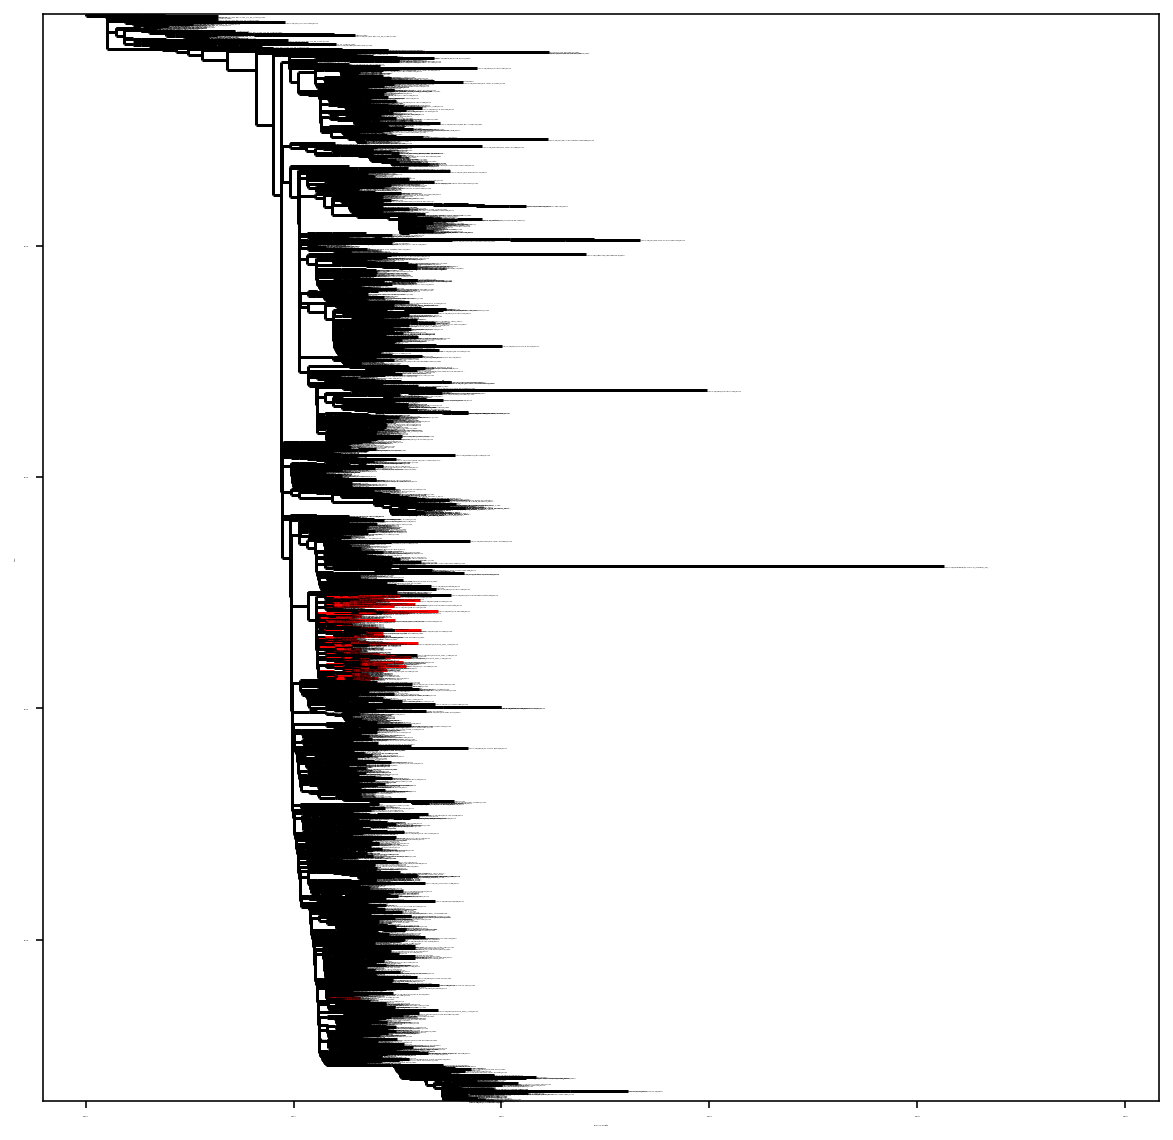

In [31]:
#To colour all the branches w/ mutation: C21727T 
tree_C21727T = tree2.as_phyloxml()

for clade in tree_C21727T.get_terminals():
    if clade.name in ds_C21727T_ls: clade.color = 'red'

#To draw a Standard Time Tree
plt.rc('font', size=0)
tree_C21727T.ladderize()
Phylo.draw(tree_C21727T)

##**6. Python vs Microreact - In Progress**

In [32]:
#T3952C
clust_c = {}
count=0

for key, value in clust.items():
  for seq in value:
      if seq in ds_T3952C_ls:
        if key not in clust_c:
            clust_c[key] = 0
        clust_c[key] += 1

print('Number of Cluster: ',len(clust))         
print('Number of sequences from Microreact: ', len(ds_T3952C_ls))
for key, value in clust_c.items():
  print(f'Number of coincidences w/ Cluster {key}: {value} ({round((value/len(ds_T3952C_ls))*100,2)}%)')

Number of Cluster:  15
Number of sequences from Microreact:  369
Number of coincidences w/ Cluster 8: 1 (0.27%)
Number of coincidences w/ Cluster 13: 368 (99.73%)


In [33]:
#C21727T
clust_c = {}
count=0

for key, value in clust.items():
  for seq in value:
      if seq in ds_C21727T_ls:
        if key not in clust_c:
            clust_c[key] = 0
        clust_c[key] += 1

print('Number of Cluster: ',len(clust))         
print('Number of sequences from Microreact: ', len(ds_C21727T_ls))
for key, value in clust_c.items():
  print(f'Number of coincidences w/ Cluster {key}: {value} ({round((value/len(ds_C21727T_ls))*100,2)}%)')

Number of Cluster:  15
Number of sequences from Microreact:  367
Number of coincidences w/ Cluster 5: 1 (0.27%)
Number of coincidences w/ Cluster 13: 366 (99.73%)
